<a href="https://colab.research.google.com/github/JasrajChouhan/open_cv_notebook/blob/main/cv02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to OpenCV using Python - 2

Sources:
1. https://www.kaggle.com/getting-started/132941
2. https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/2-Image_stats_and_image_processing.ipynb

Lets start with creating a sample image..

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image

%matplotlib inline
from matplotlib import pyplot as plt

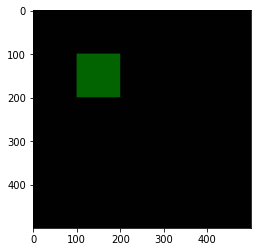

In [ ]:
blank_image = np.ones((500,500,3), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

plt.imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB))

##Basic Operations with Images

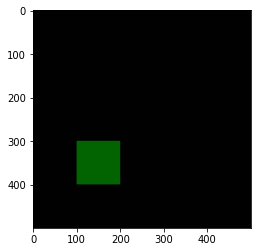

In [ ]:
flippedVer=cv2.flip(blank_image,0) # vertical flip
plt.imshow(flippedVer)

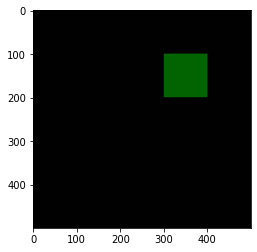

In [ ]:
flippedHor=cv2.flip(blank_image,1) # horizontal flip
plt.imshow(flippedHor)

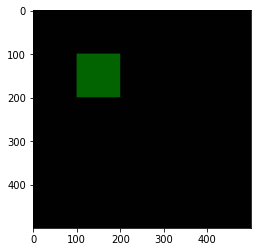

In [ ]:
transposed=cv2.transpose(blank_image)
plt.imshow(transposed)

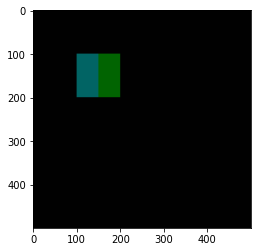

In [ ]:
blank_image[100:200,100:150,2]=100;
plt.imshow(blank_image)

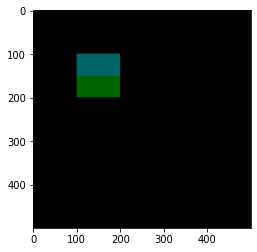

In [ ]:
transposed=cv2.transpose(blank_image)
plt.imshow(transposed)

# OpenCV Image Operations

In [ ]:
!wget --no-check-certificate \
    https://www.scrolldroll.com/wp-content/uploads/2021/04/Chhota-Bheem-Best-Cartoon-Shows-in-India-450x300.jpg \
    -O bheem.jpg

--2022-07-19 07:32:46--  https://www.scrolldroll.com/wp-content/uploads/2021/04/Chhota-Bheem-Best-Cartoon-Shows-in-India-450x300.jpg
Resolving www.scrolldroll.com (www.scrolldroll.com)... 159.65.144.197
Connecting to www.scrolldroll.com (www.scrolldroll.com)|159.65.144.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34082 (33K) [image/jpeg]
Saving to: ‘bheem.jpg’

bheem.jpg           100%[===================>]  33.28K  --.-KB/s    in 0s      

2022-07-19 07:32:47 (272 MB/s) - ‘bheem.jpg’ saved [34082/34082]



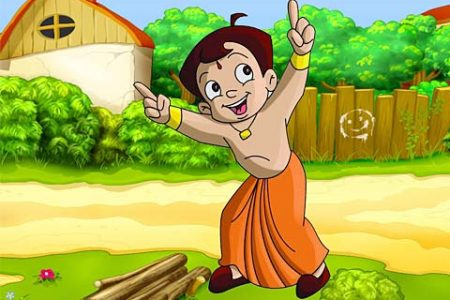

In [ ]:
image=cv2.imread('bheem.jpg')
cv2_imshow(image)

###Grayscale

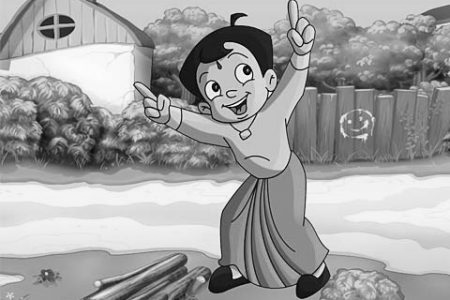

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

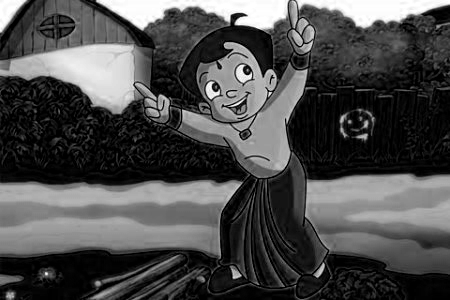

In [ ]:
B, G, R = cv2.split(image)
cv2_imshow(B)


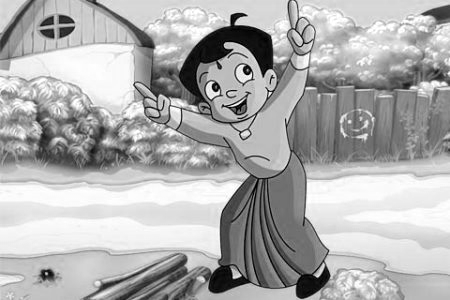

In [ ]:
cv2_imshow(G)

###Image Histograms

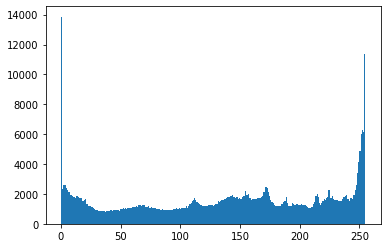

In [ ]:
h = plt.hist(image.ravel(), 256)
plt.show(h)

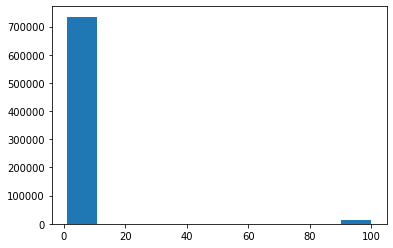

In [ ]:
h = plt.hist(blank_image.ravel())
plt.show(h)


#Image Filters

##Convolution Filters

![Filters](https://media.geeksforgeeks.org/wp-content/uploads/20211027143743/Typesofkernels.png "Filters")

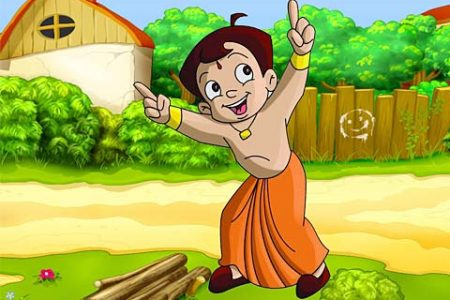

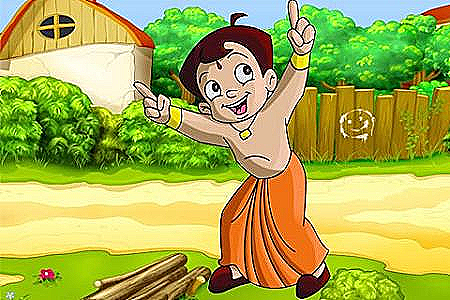

In [ ]:
kernel_sharpening = np.array([[0,-1,0],
                              [-1,5,-1],
                              [0,-1,0]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
cv2_imshow(image)
cv2_imshow(sharpened)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


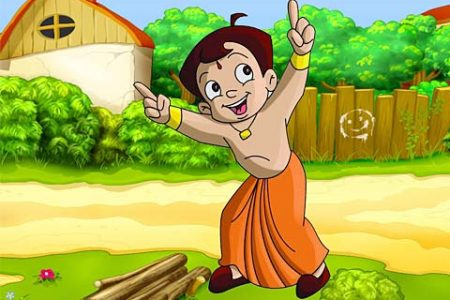

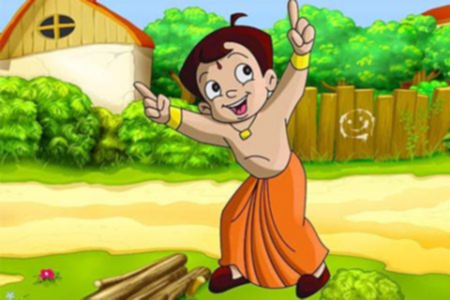

In [ ]:
kernel_blur = 1/16 * np.array([[1.,2.,1.],
                              [2.,4.,2.],
                              [1.,2.,1.]])
print(kernel_blur)
# applying different kernels to the input image
blurred = cv2.filter2D(image, -1, kernel_blur)
cv2_imshow(image)
cv2_imshow(blurred)

##Image Thresholding

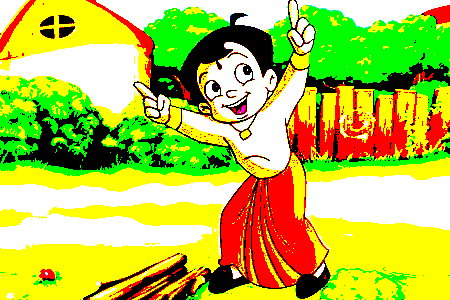

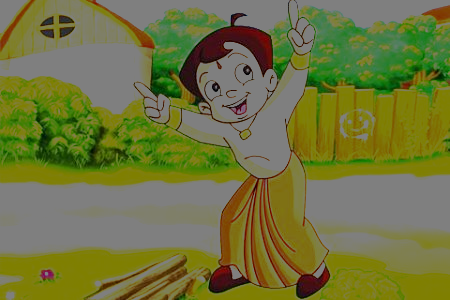

In [ ]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh2)

There is a better thresholding algorithm that does not require us to specify the threshold intensity.
Limitation: It only accepts grayscale images.

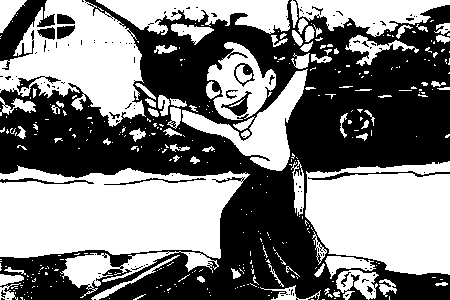

In [ ]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255,  cv2.THRESH_OTSU)
cv2_imshow(thresh)

A brief discussion on how these filters are designed is presented here: https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html

##Morphological Operations on Images

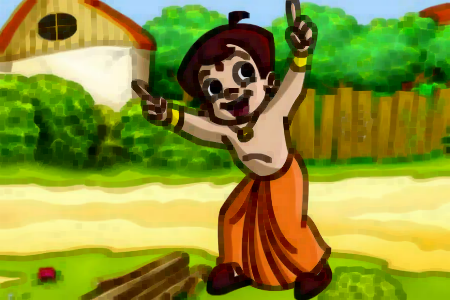

In [ ]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(image, kernel, iterations = 1)
cv2_imshow(erosion)


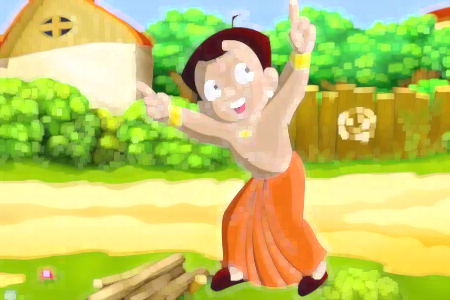

In [ ]:
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2_imshow(dilation)

##Edge Detection

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


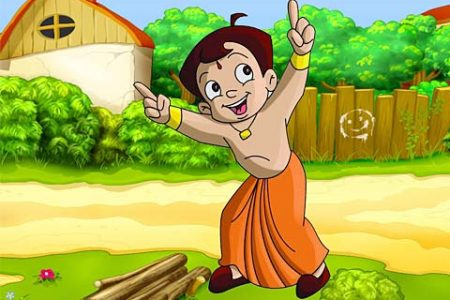

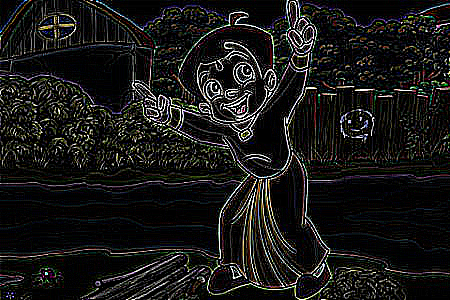

In [ ]:
kernel_edgelap =  np.array([[-1.,-1.,-1.],
                              [-1.,8.,-1.],
                              [-1.,-1.,-1.]])
print(kernel_blur)
# applying different kernels to the input image
edges = cv2.filter2D(image, -1, kernel_edgelap)
cv2_imshow(image)
cv2_imshow(edges)

There are better algorithms to do edge detection..

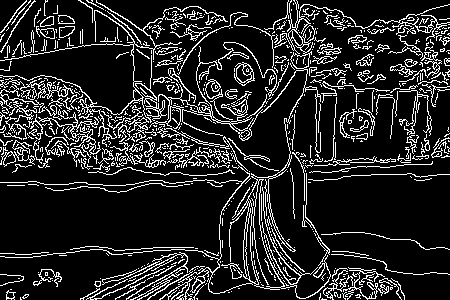

In [ ]:
canny = cv2.Canny(image,80,200)
cv2_imshow( canny)

#Image Enhancement using Filters

In [ ]:
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.3 # Simple contrast control
beta = 0.25    # Simple brightness control

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


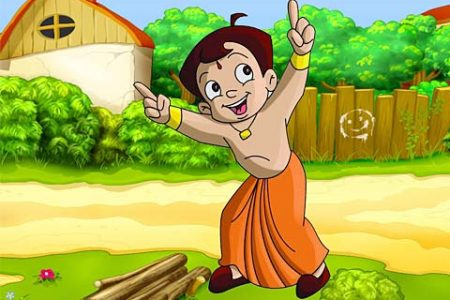

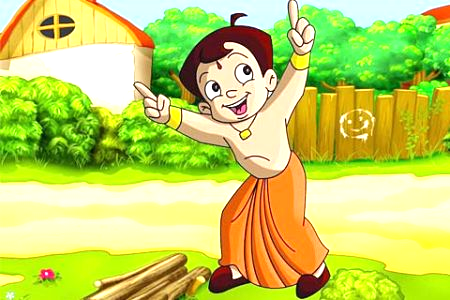

In [ ]:
cv2_imshow(image)
cv2_imshow(new_image)

There is a faster alternative to above loop.

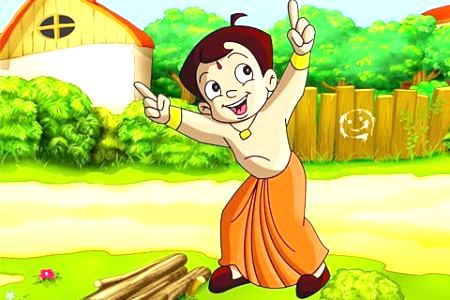

In [ ]:
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
cv2_imshow(new_image)